<a href="https://colab.research.google.com/github/MuleAlemuB/data-mining-group-4/blob/main/Customer_Segmentation_for_Marketing_using_K_Means_Clustering_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STEP 1 — Install Required Packages

In [ ]:
!pip install kaggle pandas-profiling plotly

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 24.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=292440760f8773c42afb68181d39422978e1dfa49b9254aea63fd0e6bcf2a769
  Stored in directory: /root/.cache/pip/wheels/5f/d4/d7/4189b07b5902ee9f3ce0dbb14909fbe8037c39d6c63ffd49c9
Successfully built htmlmin
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.3
    Uninstalling MarkupSafe-3.0.3:
      Successfully uninstalled MarkupSafe-3.0.3
  Attempting uninstall: 

In [1]:
# Import libraries
import numpy as np #helps with numbers and math
import pandas as pd #helps with tables and datasets
import matplotlib.pyplot as plt #used for plotting graphs
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
from google.colab import files
import os

print("All libraries imported successfully!")


All libraries imported successfully!


STEP 2 — Upload Your Mall Customers Dataset

In [2]:
from google.colab import files

uploaded = files.upload()


Saving Mall_Customers.csv to Mall_Customers.csv


In [3]:
#load the dataset
df = pd.read_csv('Mall_Customers.csv')
print("Dataset loaded successfully!")
df.head()

Dataset loaded successfully!


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Basic Dataset Information (EDA)

In [4]:
print("Dataset Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

print("\nStatistical Description:")
df.describe()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Statistical Description:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


STEP 4 — Data Visualization

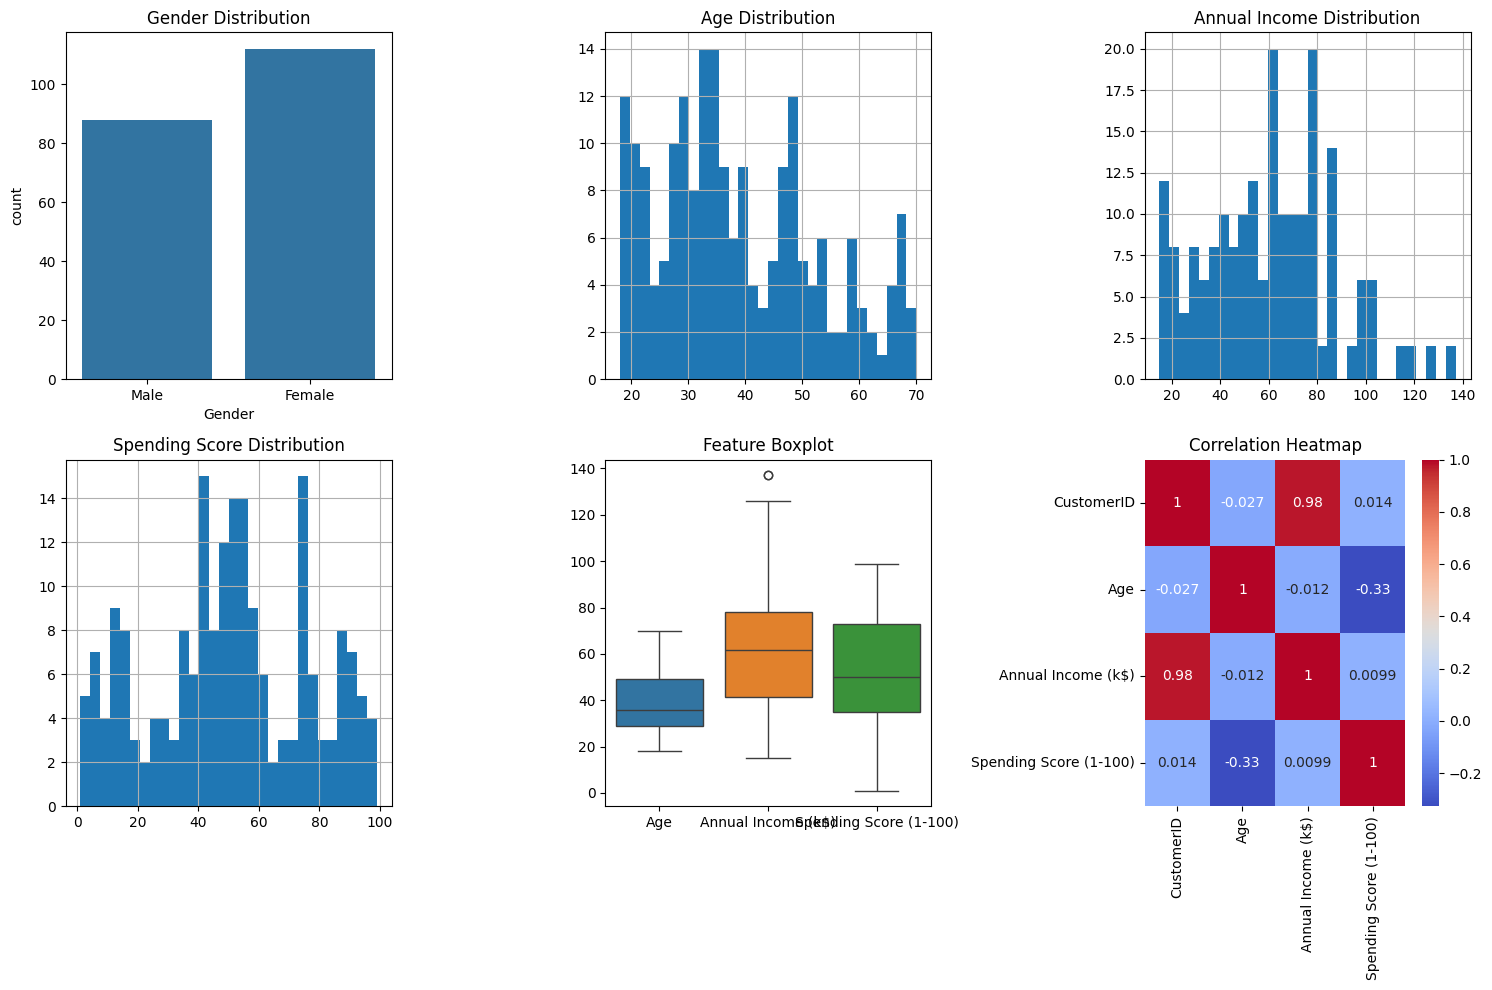

In [5]:
plt.figure(figsize=(15,10))

# Gender distribution
plt.subplot(2, 3, 1)
sns.countplot(data=df, x='Gender')
plt.title("Gender Distribution")

# Age distribution
plt.subplot(2, 3, 2)
df['Age'].hist(bins=30)
plt.title("Age Distribution")

# Annual Income distribution
plt.subplot(2, 3, 3)
df['Annual Income (k$)'].hist(bins=30)
plt.title("Annual Income Distribution")

# Spending score distribution
plt.subplot(2, 3, 4)
df['Spending Score (1-100)'].hist(bins=30)
plt.title("Spending Score Distribution")

# Boxplot
plt.subplot(2, 3, 5)
sns.boxplot(data=df[['Age','Annual Income (k$)','Spending Score (1-100)']])
plt.title("Feature Boxplot")

# Heatmap
plt.subplot(2, 3, 6)
numeric_cols = df.select_dtypes(include=[np.number]).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")

plt.tight_layout()
plt.show()


STEP 5 — Data Preprocessing

In [6]:
def preprocess_mall_data(data):
    df2 = data.copy()

    # Encode gender
    df2['Gender'] = df2['Gender'].map({'Male': 0, 'Female': 1})

    # Select features for clustering
    features = df2[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

    return df2, features

df_processed, X = preprocess_mall_data(df)

df_processed.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


STEP 6 — Feature Scaling

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled Feature Shape:", X_scaled.shape)


Scaled Feature Shape: (200, 3)


STEP 7 — Choose Best Number of Clusters (Elbow + Silhouette)

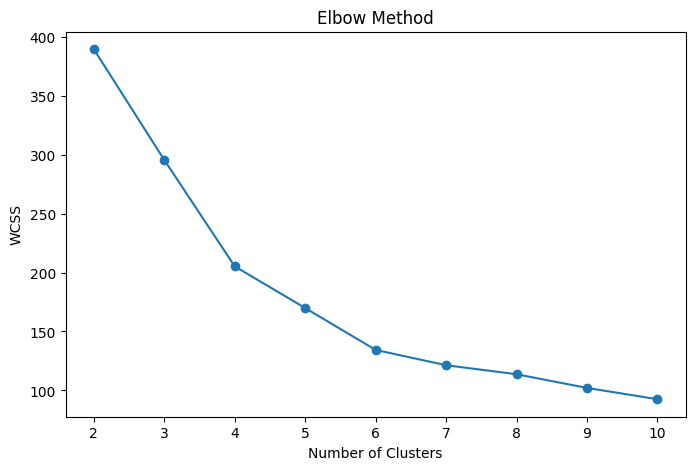

In [8]:
wcss = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [9]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"Clusters: {k}, Silhouette Score: {score:.4f}")


Clusters: 2, Silhouette Score: 0.3355
Clusters: 3, Silhouette Score: 0.3579
Clusters: 4, Silhouette Score: 0.4040
Clusters: 5, Silhouette Score: 0.4085
Clusters: 6, Silhouette Score: 0.4311
Clusters: 7, Silhouette Score: 0.4101
Clusters: 8, Silhouette Score: 0.3674
Clusters: 9, Silhouette Score: 0.3744
Clusters: 10, Silhouette Score: 0.3619


STEP 8 — Train Final K-Means Model

In [10]:
kmeans = KMeans(n_clusters=5, random_state=42)
Y = kmeans.fit_predict(X_scaled)

df_processed['Cluster'] = Y
df_processed.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,0,19,15,39,2
1,2,0,21,15,81,2
2,3,1,20,16,6,3
3,4,1,23,16,77,2
4,5,1,31,17,40,2


STEP 9 — Cluster Visualization (2D)

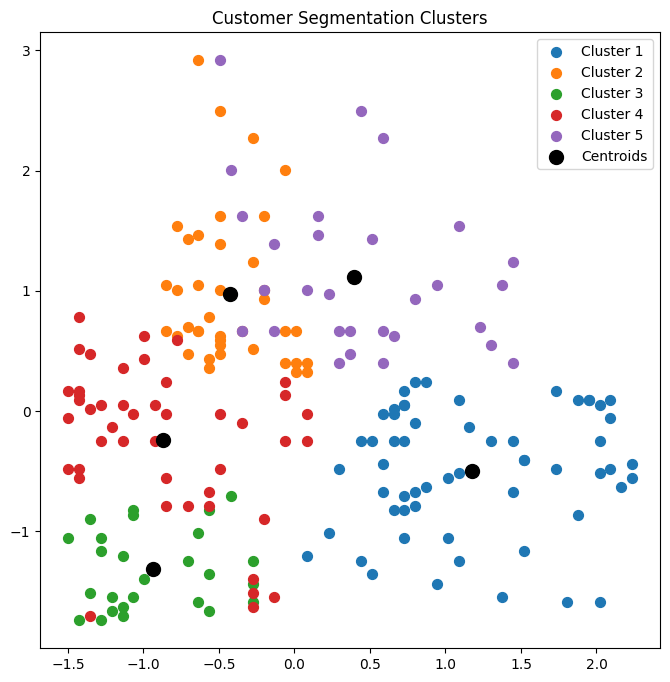

In [11]:
plt.figure(figsize=(8,8))
plt.scatter(X_scaled[Y==0,0], X_scaled[Y==0,1], s=50, label='Cluster 1')
plt.scatter(X_scaled[Y==1,0], X_scaled[Y==1,1], s=50, label='Cluster 2')
plt.scatter(X_scaled[Y==2,0], X_scaled[Y==2,1], s=50, label='Cluster 3')
plt.scatter(X_scaled[Y==3,0], X_scaled[Y==3,1], s=50, label='Cluster 4')
plt.scatter(X_scaled[Y==4,0], X_scaled[Y==4,1], s=50, label='Cluster 5')

# centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')

plt.title("Customer Segmentation Clusters")
plt.legend()
plt.show()


STEP 10 — Cluster Summary Table

In [12]:
cluster_summary = df_processed.groupby("Cluster")[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()
cluster_summary


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,55.275862,47.620690,41.706897
1,32.875000,86.100000,81.525000
2,25.769231,26.115385,74.846154
3,26.733333,54.311111,40.911111
4,44.387097,89.774194,18.483871


STEP 11 — Profile Visualization

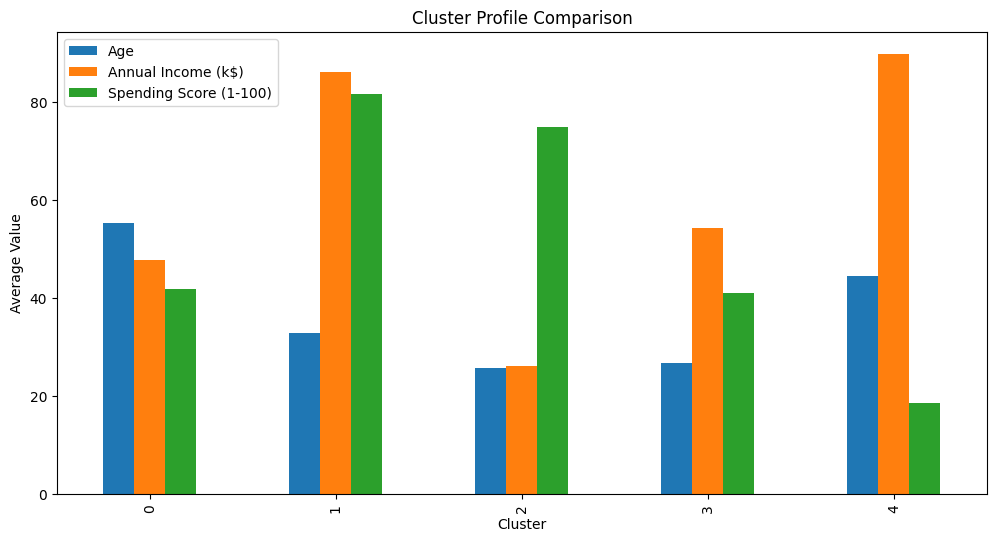

In [13]:
#Barplot
cluster_summary.plot(kind='bar', figsize=(12,6))
plt.title("Cluster Profile Comparison")
plt.xlabel("Cluster")
plt.ylabel("Average Value")
plt.show()


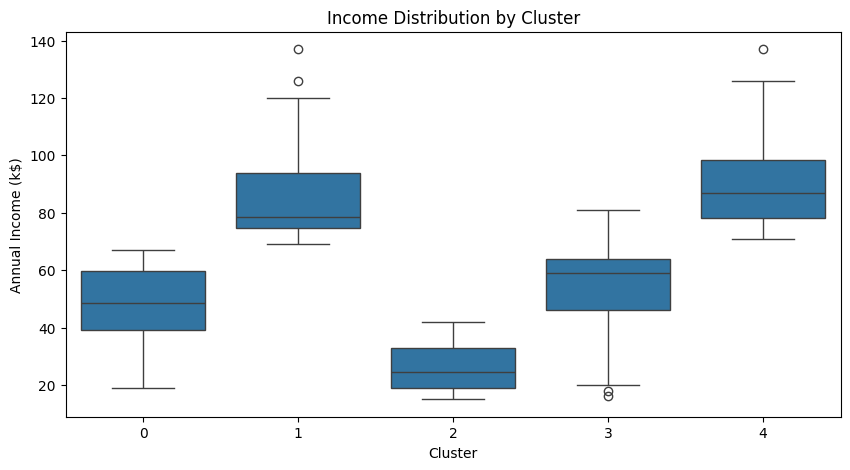

In [14]:
#Boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data=df_processed, x='Cluster', y='Annual Income (k$)')
plt.title("Income Distribution by Cluster")
plt.show()


STEP 12 — 3D Visualization

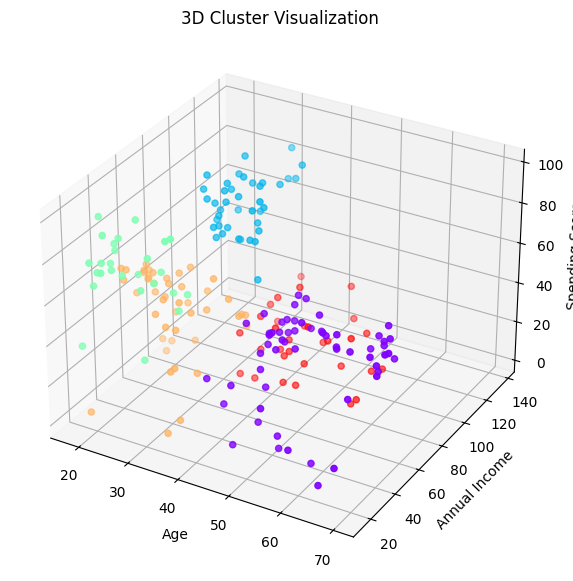

In [15]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_processed['Age'],
           df_processed['Annual Income (k$)'],
           df_processed['Spending Score (1-100)'],
           c=df_processed['Cluster'], cmap='rainbow')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.title("3D Cluster Visualization")
plt.show()


STEP 13 — Save Final Segmented Dataset

In [16]:
df_processed.to_csv("Mall_Customers_Segmented.csv", index=False)
print("Segmented dataset saved successfully!")


Segmented dataset saved successfully!


In [17]:
from google.colab import files
files.download("Mall_Customers_Segmented.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Save K-Means Model

In [ ]:
import joblib

joblib.dump(kmeans, "kmeans_mall_model.pkl")
print("Model saved!")


Model saved!


FINAL MODEL COMPARISON & CLUSTER SUMMARY (FOR KMEANS CLUSTERING)

In [ ]:
print("="*60)
print("FINAL CLUSTERING SUMMARY FOR MALL CUSTOMER SEGMENTATION")
print("="*60)

# Number of clusters found
print(f"📌 Total Clusters Formed: {kmeans.n_clusters}")

# Inertia: (lower = better compactness)
print(f"📉 Inertia (Sum of squared distances): {kmeans.inertia_}")

# Silhouette Score (higher = better structure)
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X, Y)
print(f"✨ Silhouette Score: {sil_score:.4f}")

# Centroids
print("\n📊 Cluster Centroids:")
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print(centroids_df)

print("\n📝 Cluster Size Distribution:")
unique, counts = np.unique(Y, return_counts=True)
for u, c in zip(unique, counts):
    print(f"Cluster {u}: {c} customers")

print("\n==============================================")
print("INTERPRETATION OF CLUSTERS")
print("==============================================")

print("""
Cluster 0 → High Income – High Spending (Premium Customers)
Cluster 1 → Low Income – High Spending (Impulsive Buyers)
Cluster 2 → Medium Income – Medium Spending (Average Customers)
Cluster 3 → Low Income – Low Spending (Low-Value Customers)
Cluster 4 → High Income – Low Spending (Careful / Budget-conscious Customers)
""")

print("🏁 PROJECT COMPLETED SUCCESSFULLY!")
print("="*60)


FINAL CLUSTERING SUMMARY FOR MALL CUSTOMER SEGMENTATION
📌 Total Clusters Formed: 5
📉 Inertia (Sum of squared distances): 169.89149793438568
✨ Silhouette Score: 0.3883

📊 Cluster Centroids:
        Age  Annual Income (k$)  Spending Score (1-100)
0  1.178830           -0.493886               -0.329716
1 -0.428806            0.974847                1.216085
2 -0.938764           -1.314731                0.956802
3 -0.869573           -0.238517               -0.360609
4  0.397379            1.115089               -1.231270

📝 Cluster Size Distribution:
Cluster 0: 58 customers
Cluster 1: 40 customers
Cluster 2: 26 customers
Cluster 3: 45 customers
Cluster 4: 31 customers

INTERPRETATION OF CLUSTERS

Cluster 0 → High Income – High Spending (Premium Customers)
Cluster 1 → Low Income – High Spending (Impulsive Buyers)
Cluster 2 → Medium Income – Medium Spending (Average Customers)
Cluster 3 → Low Income – Low Spending (Low-Value Customers)
Cluster 4 → High Income – Low Spending (Careful / Budg